# Equalização de Histograma

"Este método geralmente aumento o contraste global de várias imagens, especialmente quando os dados uteis de uma imagem estão representados por valores com contraste próximo. Através deste ajuste, as intencidades podem ser melhor distribuídas no histograma. Isto permite que as regiões com baixo contraste ganhem mais contraste. A equalização de histograma alcança este resultado espalhando os valores de intensidade mais frequentes.

Este método é util em imagens em que ambos o fundo e primeiro plano estejam ao mesmo tempo escuros ou claros. Em particular, este método pode levar a uma melhor visualização dos ossos em uma imagem de raio-x, e uma melhor visualização de detalhes em fotografias com sob ou sobre-exposição. Uma vantagem deste método é ser simples e inversível. Em teoria, se a função de equalização de histograma é conhecida, o histograma original pode ser recuperado. O custo computacional não é alto. Uma disvantagem deste método é o fato de que ele não faz distinção entre ruído de fundo e sinal, podendo assim aumentar o contraste do ruído equanto diminui o contraste do sinal de interesse."
([Wikipedia](http://en.wikipedia.org/wiki/Histogram_equalization))

![equalizacao de histograma](imgs/histogrammspreizung.png)

Considere uma imagem digital em tons de cinza $x$ com um total de $n$ pixels, e seja $n_i$ o número de ocorrências do $i$-ésimo nível de cinza. A probabilidade de ocorrência de um pixel de nível $i$ na imagem é aproximado por

$p_x(i) = p(x=i) = \frac{n_i}{n},\quad 0 \le i < L $

$L$ é o número de tons de cinzas existentes na escala e $p_x(i)$ é, na verdade, o histograma de pixel para o o $i$-ésimo tom de cinza, normalizado em $[0,1]$.

Vamos definir a função de distribuição cumulativa correspondente (CDF) a $p_x$ como

$ cdf_x(i) = \sum_{j=0}^i p_x(j) $

que é também o histograma acumulado da imagem.

Queremos definir uma transformação da forma $y = T(x)$ para produzir uma nova imagem $\{y\}$, tal que sua CDF seja linear sobre toda a extensão dos valores (tons de cinza), i.e.,

$cdf_y(i) = iK$

para alguma constante $K$. As propriedades da CDF nos permitem realizar tal transformação definida por

$y = T(x) = cdf_x(x)$

Note que $T$ mapeia os níveis na extensão $[0,1]$. Para mapear os valors de volta à sua extensão original, a seguinte transformação deverá ser aplicada:

$ y^\prime = y \cdot(\max\{x\} - \min\{x\}) + \min\{x\} $

### Referências
- http://en.wikipedia.org/wiki/Histogram_equalization
- http://fourier.eng.hmc.edu/e161/lectures/contrast_transform/node2.html
- http://math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf
- The Image Processing Handbook, John C. Russ, página 274



A função abaixo implementa a normalização de histograma, conforme definida acima. Os argumentos de entrada são os nomes dos arquivos de entrada e saída. Entretanto, apenas o nome do arquivo de entrada é obrigatório pois, caso o nome do arquivo de saída não seja fornecido, será feito um plot comparando a imagem original e a imagem após a normalização de histograma.

In [6]:
function B = histogram_equalization(infilename,outfilename)
  if nargin < 1 || !exist(infilename), error('please provide a valid input file name'); endif
  A = imread(infilename);
  A = double(A);
  [M,N] = size(A);
  A = A(:);
  h = hist(A,[0:255])./(M*N);  
  cdf = cumsum(h);
  T = round( 255*(cdf - min(cdf)) / (1-min(cdf)) ); % transform function
  B = [];
  for i = 1 : length(A),
      B(i) = T(A(i)+1);
  end;
  B = reshape(B,M,N);
  if nargin < 2,
     A = reshape(A,M,N);
     c = repmat([0:255]'./255,1,3);
     figure("position",get(0,"screensize")./[1 1 2 3])
     subplot(1,2,1); image(uint8(A)); colormap(c); title('original');
     subplot(1,2,2); image(uint8(B)); colormap(c); title('after histogram normalization');
  else
     imwrite(uint8(B),outfilename);
  end;
endfunction

A seguir apresentamos um exemplo para testar a função criada acima.

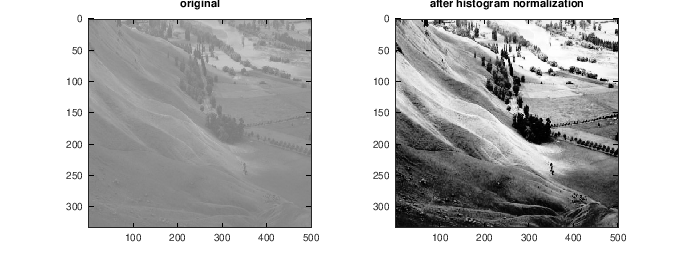

In [8]:
infilename = 'imgs/unequalized.jpg';
histogram_equalization(infilename);